<a href="https://colab.research.google.com/github/ProfessorDong/Deep-Learning-Course-Examples/blob/master/ML_Examples/LinearRegressionTFv2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

url="https://www.professordong.com/DLdata/Admission_Predict_Ver1.1.csv"
data = pd.read_csv(url)
data.head()

continuous_features = data[ ['GRE Score','TOEFL Score','University Rating','SOP','LOR ','CGPA'] ].values / 100 
categorical_research_features = data[ [ 'Research' ] ].values 

X = np.concatenate( [ continuous_features , categorical_research_features ] , axis=1 )
Y = data[ [ 'Chance of Admit ' ] ].values

train_features , test_features ,train_labels, test_labels = train_test_split( X , Y , test_size=0.2 )

X = tf.constant( train_features , dtype=tf.float32 )
Y = tf.constant( train_labels , dtype=tf.float32 ) 
                                                          
test_X = tf.constant( test_features , dtype=tf.float32 ) 
test_Y = tf.constant( test_labels , dtype=tf.float32 ) 

In [6]:
print(data)
continuous_features

     Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0             1        337          118                  4  4.5   4.5  9.65   
1             2        324          107                  4  4.0   4.5  8.87   
2             3        316          104                  3  3.0   3.5  8.00   
3             4        322          110                  3  3.5   2.5  8.67   
4             5        314          103                  2  2.0   3.0  8.21   
..          ...        ...          ...                ...  ...   ...   ...   
495         496        332          108                  5  4.5   4.0  9.02   
496         497        337          117                  5  5.0   5.0  9.87   
497         498        330          120                  5  4.5   5.0  9.56   
498         499        312          103                  4  4.0   5.0  8.43   
499         500        327          113                  4  4.5   4.5  9.04   

     Research  Chance of Admit   
0           1    

array([[3.37  , 1.18  , 0.04  , 0.045 , 0.045 , 0.0965],
       [3.24  , 1.07  , 0.04  , 0.04  , 0.045 , 0.0887],
       [3.16  , 1.04  , 0.03  , 0.03  , 0.035 , 0.08  ],
       ...,
       [3.3   , 1.2   , 0.05  , 0.045 , 0.05  , 0.0956],
       [3.12  , 1.03  , 0.04  , 0.04  , 0.05  , 0.0843],
       [3.27  , 1.13  , 0.04  , 0.045 , 0.045 , 0.0904]])

In [7]:
def mean_squared_error( Y , y_pred ):
    return tf.reduce_mean( tf.square( y_pred - Y ) )

def mean_squared_error_deriv( Y , y_pred ):
    return tf.reshape( tf.reduce_mean( 2 * ( y_pred - Y ) ) , [ 1 , 1 ] )
    
def h ( X , weights , bias ):
    return tf.tensordot( X , weights , axes=1 ) + bias

In [8]:
num_epochs = 10
num_samples = X.shape[0]
batch_size = 10
learning_rate = 0.001

dataset = tf.data.Dataset.from_tensor_slices(( X , Y )) 
dataset = dataset.shuffle( 500 ).repeat( num_epochs ).batch( batch_size )
iterator = dataset.__iter__()

In [9]:
num_features = X.shape[1]
weights = tf.random.normal( ( num_features , 1 ) ) 
bias = 0

epochs_plot = list()
loss_plot = list()

for i in range( num_epochs ) :
    
    epoch_loss = list()
    for b in range( int(num_samples/batch_size) ):
        x_batch , y_batch = iterator.get_next()
   
        output = h( x_batch , weights , bias ) 
        loss = epoch_loss.append( mean_squared_error( y_batch , output ).numpy() )
    
        dJ_dH = mean_squared_error_deriv( y_batch , output)
        dH_dW = x_batch
        dJ_dW = tf.reduce_mean( dJ_dH * dH_dW )
        dJ_dB = tf.reduce_mean( dJ_dH )
    
        weights -= ( learning_rate * dJ_dW )
        bias -= ( learning_rate * dJ_dB ) 
        
    loss = np.array( epoch_loss ).mean()
    epochs_plot.append( i + 1 )
    loss_plot.append( loss ) 
    
    print( 'Loss is {}'.format( loss ) ) 

Loss is 33.4202880859375
Loss is 16.01815414428711
Loss is 7.682672023773193
Loss is 3.6888318061828613
Loss is 1.7781727313995361
Loss is 0.86390620470047
Loss is 0.4279415011405945
Loss is 0.2212076187133789
Loss is 0.1227458268404007
Loss is 0.07637150585651398


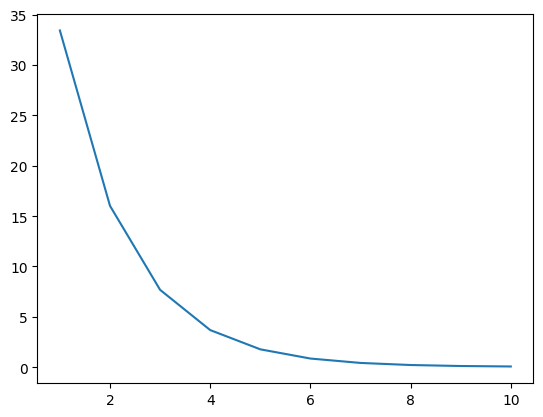

In [10]:
import matplotlib.pyplot as plt
plt.plot( epochs_plot , loss_plot ) 
plt.show()

In [11]:
output = h( test_X , weights , bias ) 
labels = test_Y

accuracy_op = tf.metrics.MeanAbsoluteError() 
accuracy_op.update_state( labels , output )
print( 'Mean Absolute Error = {}'.format( accuracy_op.result().numpy() ) )

Mean Absolute Error = 0.21442380547523499
